In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Load data into dataframe
file_path = Path('Resources/refactored_data/combineddata.csv')
df = pd.read_csv(file_path)
df.head()

,countid,yearvalue,monthvalue,weeknumber,locationname,daterecorded,maxtempf,mintempf,precipitationinch,watertempf,stlheadcount
0,19900101,1990,1,1,Bonneville,1990-01-01,49.0,35.0,0.89,NaN,NaN
1,19900102,1990,1,1,Bonneville,1990-01-02,45.0,36.0,0.85,NaN,NaN
2,19900103,1990,1,1,Bonneville,1990-01-03,46.0,39.0,0.02,NaN,NaN
3,19900104,1990,1,1,Bonneville,1990-01-04,49.0,42.0,0.04,NaN,NaN
4,19900105,1990,1,1,Bonneville,1990-01-05,53.0,45.0,0.47,NaN,NaN


In [3]:
# Pull desired columns
df_stlhead_week_month = df[['weeknumber','monthvalue','maxtempf','mintempf','precipitationinch','watertempf','stlheadcount']]
df_stlhead_week_month.head(3)

,weeknumber,monthvalue,maxtempf,mintempf,precipitationinch,watertempf,stlheadcount
0,1,1,49.0,35.0,0.89,NaN,NaN
1,1,1,45.0,36.0,0.85,NaN,NaN
2,1,1,46.0,39.0,0.02,NaN,NaN


In [4]:
# Drop NaN values
week_month = df_stlhead_week_month.dropna(axis=0)
week_month.head()

,weeknumber,monthvalue,maxtempf,mintempf,precipitationinch,watertempf,stlheadcount
73,11,3,53.0,38.0,0.12,44.06,27.0
74,11,3,69.0,38.0,0.00,44.96,44.0
75,11,3,61.0,44.0,0.00,44.06,36.0
76,12,3,59.0,44.0,0.02,44.96,60.0
77,12,3,67.0,44.0,0.00,46.04,46.0


In [5]:
week_month

,weeknumber,monthvalue,maxtempf,mintempf,precipitationinch,watertempf,stlheadcount
73,11,3,53.0,38.0,0.12,44.06,27.0
74,11,3,69.0,38.0,0.00,44.96,44.0
75,11,3,61.0,44.0,0.00,44.06,36.0
76,12,3,59.0,44.0,0.02,44.96,60.0
77,12,3,67.0,44.0,0.00,46.04,46.0
...,...,...,...,...,...,...,...
11583,38,9,76.0,52.0,0.93,66.56,590.0
11584,39,9,60.0,51.0,1.50,66.56,702.0
11585,39,9,64.0,50.0,0.58,66.74,698.0
11586,39,9,75.0,50.0,0.00,66.38,1004.0


In [11]:
# Make a df grouped by average count on monthvalue
week_df = df.groupby(['weeknumber']).mean().reset_index()
week_df = week_df.drop(columns = ['monthvalue'])
week_df

,weeknumber,countid,yearvalue,maxtempf,mintempf,precipitationinch,watertempf,stlheadcount
0,1,2.005568e+07,2005.558140,43.346457,33.669355,0.363125,40.810690,15.786667
1,2,2.005511e+07,2005.500000,43.072072,34.340807,0.413705,40.291250,14.858268
2,3,2.005512e+07,2005.500000,42.945946,34.198198,0.390773,39.258776,13.894309
3,4,2.005512e+07,2005.500000,44.500000,35.230769,0.343198,38.791753,13.440000
4,5,2.005514e+07,2005.500000,45.963636,36.290323,0.397162,38.704082,15.000000
5,6,2.005520e+07,2005.500000,46.577273,35.465438,0.334107,38.968298,14.175000
6,7,2.005521e+07,2005.500000,47.278027,35.369369,0.245561,39.102653,16.396825
7,8,2.005522e+07,2005.500000,49.227907,36.098592,0.352192,39.478351,19.671875
8,9,2.005524e+07,2005.500000,49.289593,35.168950,0.242377,40.075876,22.907692
9,10,2.005530e+07,2005.500000,50.773148,36.288372,0.340968,40.784706,31.375940


In [12]:
week_df = week_df.astype({'stlheadcount': 'int64'})

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [13]:
week_df.dtypes

weeknumber             int64
countid              float64
yearvalue            float64
maxtempf             float64
mintempf             float64
precipitationinch    float64
watertempf           float64
stlheadcount         float64
dtype: object

In [ ]:
# Make a df grouped by average count on monthvalue
month_df = week_month.groupby(['monthvalue']).mean().reset_index()
month_df.head()

Visualizations

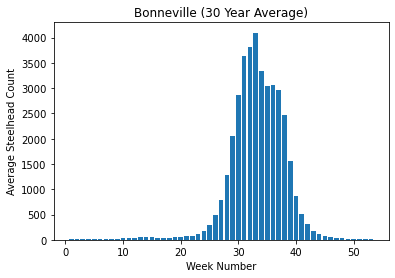

<Figure size 432x288 with 0 Axes>

In [17]:
# Bar plot of weekly average of fish count over 30 years
plt.bar(week_df.weeknumber, week_df.stlheadcount)
plt.title('Bonneville (30 Year Average)')
plt.xlabel('Week Number')
plt.ylabel('Average Steelhead Count')
plt.show()
plt.savefig("Images/Steelhead_Count_by_Week.png")

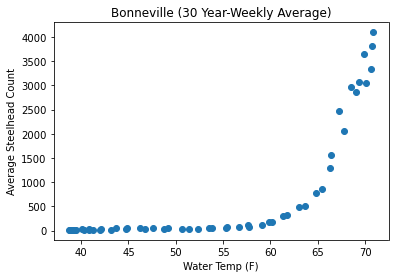

In [18]:
# Plot of fish count by water temperature
plt.scatter(week_df.watertempf, week_df.stlheadcount)
plt.title('Bonneville (30 Year-Weekly Average)')
plt.xlabel('Water Temp (F)')
plt.ylabel('Average Steelhead Count')
plt.show()

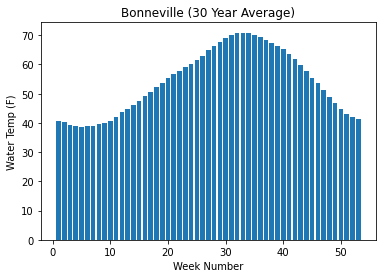

In [23]:
# Bar plot of weekly average of fish count over 30 years
plt.bar(week_df.weeknumber, week_df.watertempf)
plt.title('Bonneville (30 Year Average)')
plt.xlabel('Week Number')
plt.ylabel('Water Temp (F)')
plt.show()

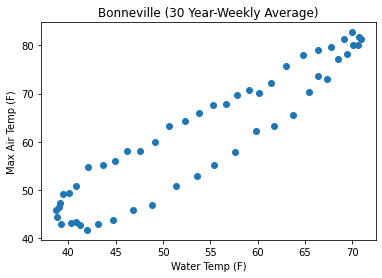

In [24]:
# Plot of Max air temperature by Water temp
plt.scatter(week_df.watertempf, week_df.maxtempf)
plt.title('Bonneville (30 Year-Weekly Average)')
plt.xlabel('Water Temp (F)')
plt.ylabel('Max Air Temp (F)')
plt.show()

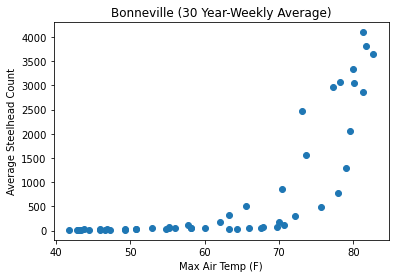

In [25]:
# Plot of fish count by max air temp
plt.scatter(week_df.maxtempf, week_df.stlheadcount)
plt.title('Bonneville (30 Year-Weekly Average)')
plt.xlabel('Max Air Temp (F)')
plt.ylabel('Average Steelhead Count')
plt.show()

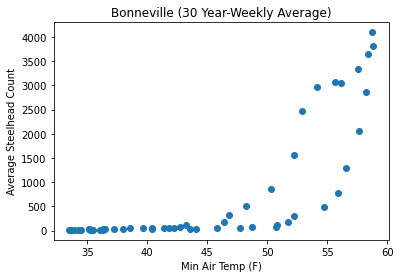

In [26]:
# Plot of fish count by min air temp
plt.scatter(week_df.mintempf, week_df.stlheadcount)
plt.title('Bonneville (30 Year-Weekly Average)')
plt.xlabel('Min Air Temp (F)')
plt.ylabel('Average Steelhead Count')
plt.show()

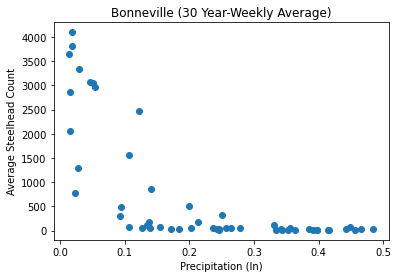

In [27]:
# Plot of fish count by rain
plt.scatter(week_df.precipitationinch, week_df.stlheadcount)
plt.title('Bonneville (30 Year-Weekly Average)')
plt.xlabel('Precipitation (In)')
plt.ylabel('Average Steelhead Count')
plt.show()

# Machine learning

In [28]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# labelencoder = LabelEncoder()
# week_df['stlheadcount'] = labelencoder.fit_transform(week_df['stlheadcount'])

In [ ]:
target = ['stlheadcount']

In [ ]:
# Creating features
X = week_df.drop('stlheadcount', axis=1)
# X = pd.get_dummies(X)

# Creating target
y = week_df['stlheadcount']
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
X_train.dtypes

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
y_train.dtypes

In [ ]:
y_train.describe()

In [ ]:
# X_scaled = StandardScaler().fit_transform(X_train)
# print(X_scaled[0:5])

In [ ]:
# X_scaled.dtype

In [ ]:
# y_scaled = StandardScaler().fit_transform(y_train)
# print(y_scaled[0:5])

In [ ]:
# y_scaled.dtype

## Naive Random Oversampling

In [ ]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

In [ ]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
list(model.predict(X_test[:10]))

In [ ]:
y_test[:10]

In [ ]:
model.score(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
# Plot of fish count by rain
plt.scatter(model.predict(X_test)[:10], y_test[:10])

plt.show()

In [ ]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
nro = balanced_accuracy_score(y_test, y_pred)
nro

In [ ]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

## SMOTE Oversampling

In [ ]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(
    X_train, y_train
)
Counter(y_resampled)

In [ ]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
# Calculated the balanced accuracy score
smote_bac = balanced_accuracy_score(y_test, y_pred)
smote_bac

In [ ]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

## Undersampling

In [ ]:
# Resample the data using the ClusterCentroids resampler
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X, y)
Counter(y_resampled)

In [ ]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
under_bac = balanced_accuracy_score(y_test, y_pred)
under_bac

In [ ]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

## SMOTEENN

In [ ]:
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
Counter(y_resampled)

In [ ]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
smoteen_bac = balanced_accuracy_score(y_test, y_pred)

In [ ]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

In [ ]:
### Balanced Random Forest Classifier

In [ ]:
# Create a random forest classifier.
from imblearn.ensemble import BalancedRandomForestClassifier
brfc_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model
brfc_model = brfc_model.fit(X_train, y_train)
brfc_model

In [ ]:
# Calculated the balanced accuracy score
predictions = brfc_model.predict(X_test)
brfc_bac = balanced_accuracy_score(y_test, predictions)
brfc_bac

In [ ]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, predictions))

In [ ]:
## Easy Ensemble AdaBoost Classifier

In [ ]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier

eec_model = EasyEnsembleClassifier(n_estimators=100, random_state=1)

eec_model = eec_model.fit(X_train, y_train)

In [ ]:
# Calculated the balanced accuracy score
predictions = eec_model.predict(X_test)
ee_bac = balanced_accuracy_score(y_test, predictions)
ee_bac

In [ ]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

In [ ]:
# X = week_df.watertempf.values.reshape(-1, 1)

In [ ]:
# X.shape

In [ ]:
# y = week_df.stlheadcount

In [ ]:
# model = LinearRegression()

In [ ]:
# model.fit(X,y)

In [ ]:
# y_pred = model.predict(X)
# print(y_pred.shape)

In [ ]:
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')
plt.show()

In [ ]:
# SVM (support vector machines)

In [ ]:
X.describe()

In [ ]:
y.describe()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# print("Training:", Counter(y_train['stlheadcount']))
# print("Test:", Counter(y_test['stlheadcount']))

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
X_train.dtypes

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(week_df[stlheadcount]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(stlheadcount)
encode_df.head()

In [ ]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
# print(Counter(y_resampled['stlheadcount']))

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)

In [ ]:
y_pred = model.predict(X)
print(y_pred.shape)

In [ ]:
y.describe()

In [ ]:
plt.scatter(df.Week_Number, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [ ]:

print(accuracy_score(y_test, y_pred))